# Probability distributions

To understand probability distributions, let us first look at the concept of random variables, which are used to model probability distributions.  

**Random variable:** A variable whose values are numerical outcomes of some random process or A function that assigns values to each of an experiment's outcomes. It is generally denoted by $X$.

Random variables are of two types:
1. **Discrete random variables** can take a finite, countable number of values. For example, a dice roll can take values like 1, 2, 3, 4, 5 and 6. 

2. **Continuous random variables** can take infinitely many values. Examples include temperature, height, and weight. 

The **probability mass function,** or **PMF** associated with a discrete random variable is a function that provides the probability that this variable is exactly equal to a certain discrete value.

![](data/dpd.png)

$$The\ graph\ of\ a\ probability\ mass\ function.\ All\ the\ values\ of\ this\ function\ must\ be\ non\ negative\ and\ sum\ up\ to\ 1.$$

But for a continuous variable, we cannot find the absolute probability. Why? As we see, with continous variables the number of possible outcomes are infinite. For example: If we consider weight, it can  be 25.0001 kgs, 25.0000003 kgs, and so on..
So if we try to calculate absolute probabilty of weight to be 25 kgs it turns out to be zero.

Hence, we use the **probability density function,** or **PDF** for continuous variables (the equivalent of PMF for discrete variables). The PDF is the probability that the value of a continuous random variable falls within a range of values. 

The **cumulative distribution function,** or **CDF** gives the probability of a random variable being less than or equal to a given value. It is the integral of the PDF and gives the area under the curve defined by the PDF up to a certain point.


The common types of probability distributions for discrete random variables: Binomial, Uniform and Poisson.

## **Binomial Distribution**  
 
To understand the binomial distribution lets look at **binomial experiments**.  
A binomial experiment is an experiment that has the following properties:

+ The experiment consists of $n$ repeated trials.
+ Each trial has only two possible outcomes.
+ The probability of success ($p$) and failure ($1-p$) is the same for each trial.
+ Each trial is independent.

A simple example is tossing an unbiased coin for $n$ times. In this example, the probability that the outcome might be heads can be considered equal to $p$ and $1-p$ for tails (the probabilities of mutually exclusive events that encompass all possible outcomes needs to sum up to one). Each time the coin is tossed the outcome is independent of all other trails.

The **binomial distribution** describes the probability of obtaining $k$ successes in $n$ binomial experiments.

If a random variable $X$ follows a binomial distribution, then the probability that $X = k$ successes can be found by the following formula:

$$P(X=k) = ^n C_k p^k (1-p)^{n-k}$$
Where,   
$p$ is the probability of success   
$(1-p)$ is the probability of failure  
$n$ is the number of trials  


The binomial distribution has the following properties:

+ Mean = $n*p$ (number of trials * probability of success)  
+ Variance = $n*p*q$ (number of trials * probability of success * probability of failure)  



**Example:**

By some estimates, twenty-percent (20%) of countrys population have no health insurance. Randomly sample n=15 people. Let X denote the number in the sample with no health insurance. 
1. What is the probability that exactly 3 of the 15 sampled have no health insurance?
2. What is the probability that at most one of those sampled has no health insurance?

First part of the solution: **Calculating Binomial Probabilites**

$$P(X=3) = ^{15}C_3(0.2)^3(0.8)^{12} = 0.25$$

That is, there is a 25% chance, in sampling 15 random people, that we would find exactly 3 that had no health insurance.

In [1]:
import scipy.stats as stats
n, r, p = 15, 3, 0.2
stats.binom.pmf(r, n, p)  # Using PMF

0.2501388953190411

Second part of the solution: **Calculating Cumulative Binomial Probabilities**
    
"At most one" means either 0 or 1 of those sampled have no health insurance. That is, we need to find:

$$P(X\leq1) = P(X=0)+P(X=1)$$

Using the probability mass function for a binomial random variable with n=15 and p=0.2, we have

$$^{15}C_0 (0.2)^{0}(0.8)^{15} + ^{15}C_1 (0.2)^{1}(0.8)^{14} = 0.0352 + 0.1319 = 0.167$$

That is, we have a 16.7% chance, in sampling 15 random people, that we would find at most one that had no health insurance.

In [2]:
import scipy.stats as stats
n, r, p = 15, 1, 0.2
stats.binom.cdf(r, n, p)  # Using CDF

0.16712576742195218

### **Effect of n and p on Shape**

1. For small *p* and small *n*, the binomial distribution is what we call skewed right.  
2. For large *p* and small *n*, the binomial distribution is what we call skewed left.  
3. For *p*=0.5 and large and small *n* , the binomial distribution is what we call symmetric.  
4. For small *p* and large *n*, the binomial distribution approaches symmetry.  

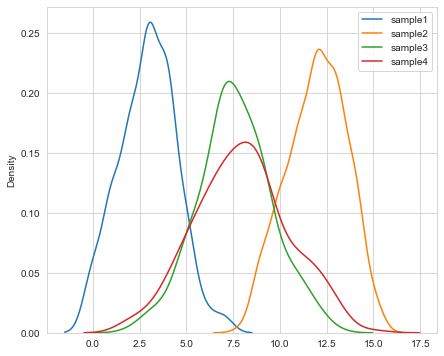

In [3]:
from numpy import random
import matplotlib.pyplot as plt 
import seaborn as sns 


plt.figure(figsize=(7,6))
sns.set_style("whitegrid")

sample1 = random.binomial(n = 15, p = 0.2, size = 250)
sample2 = random.binomial(n = 15, p = 0.8, size = 250)
sample3 = random.binomial(n = 15, p = 0.5, size = 250)
sample4 = random.binomial(n = 40, p = 0.2, size = 250)

sns.kdeplot(sample1, label="sample1")
sns.kdeplot(sample2, label="sample2")
sns.kdeplot(sample3, label="sample3")
sns.kdeplot(sample4, label="sample4")

plt.legend(labels=["sample1","sample2","sample3","sample4"])

plt.show()

### NOTE:   

The **Bernoulli distribution** is a special case of the binomial distribution where a single trial is conducted (so n would be 1 for such a binomial distribution). It is also a special case of the two-point distribution, for which the possible outcomes need not be 0 and 1.

$$P(n) = P^n (1-P)^{1-n}$$

## Geometric distribution

The geometric distribution describes the probability of experiencing a certain amount of failures before experiencing the first success in a series of Bernoulli trials. A Bernoulli trial is an experiment with only two possible outcomes – “success” or “failure” – and the probability of success is the same each time the experiment is conducted. An example of a Bernoulli trial is a coin flip. The coin can only land on two sides (we could call heads a “success” and tails a “failure”) and the probability of success on each flip is 0.5, assuming the coin is fair.

If a random variable X follows a geometric distribution, then the probability of experiencing k failures before experiencing the first success can be found by the following formula:

$$P(X=k) = (1-p)^kp$$

where:

$k$ is number of failures before first success  
$p$ is probability of success on each trial  

For example, suppose we want to know how many times we'll have to flip a fair coin until it lands on heads. We can use the formula above to determine the probability of experiencing 0, 1, 2, 3 failures, etc. before the coin lands on heads:

**Note:** The coin can experience 0 'failure' if it lands on heads on the first flip.

$P(X=0) = (1-.5)^0(.5) = 0.5$

$P(X=1) = (1-.5)^1(.5) = 0.25$

$P(X=2) = (1-.5)^2(.5) = 0.125$

$P(X=3) = (1-.5)^3(.5) = 0.0625$

## Uniform distribution  

The uniform distribution is a probability distribution in which every value between an interval from $a$ to $b$ is equally likely to occur.

If a random variable $X$ follows a uniform distribution, then the probability that $X$ takes on a value between $x_1$ and $x_2$ can be found by the following formula:

$$P(x_1 < X < x_2) = \frac{(x_2 – x_1)}{(b – a)}$$

where:

$x_1$: the lower value of interest  
$x_2$: the upper value of interest  
$a$: the minimum possible value  
$b$: the maximum possible value  

![](data/ud.png)

For example, suppose the weight of dolphins is uniformly distributed between 100 pounds and 150 pounds.

If we randomly select a dolphin at random, we can use the formula above to determine the probability that the chosen dolphin will weigh between 120 and 130 pounds:

$P(120 < X < 130) = (130 – 120) / (150 – 100) = 10 / 50 = 0.2$


The probability that the chosen dolphin will weigh between 120 and 130 pounds is 0.2.

**Properties of the Uniform Distribution**

The uniform distribution has the following properties:

+ Mean: (a + b) / 2
+ Median: (a + b) / 2
+ Standard Deviation: √(b – a)2 / 12
+ Variance: (b – a)2 / 12

## **Poisson distribution**


Again, to understand the Poisson distribution, we first have to understand what **Poisson experiments** are.

A Poisson experiment is an experiment that has the following properties:

+ The number of successes in the experiment can be counted.
+ The mean number of successes that occurs during a specific interval of time (or space) is known.
+ Each outcome is independent.
+ The probability that a success will occur is proportional to the size of the interval


One example of a Poisson experiment is the number of births per hour at a given hospital. For example, suppose a particular hospital experiences an average of 10 births per hour. This is a Poisson experiment because it has the following four properties:

+ The number of successes in the experiment can be counted – We can count the number of births.
+ The mean number of successes that occurs during a specific interval of time is known – It is known that an average of 10 births per hour occur.
+ Each outcome is independent – The probability that one mother gives birth during a given hour is independent of the probability of another mother giving birth.
+ The probability that a success will occur is proportional to the size of the interval – the longer the interval of time, the higher the probability that a birth will occur.

We can use the Poisson distribution to answer questions about probabilities regarding this Poisson experiment such as:

+ What is the probability that more than 12 births occur in a given hour?
+ What is the probability that less than 5 births occur in a given hour?
+ What is the probability that between 8 to 11 births occur in a given hour?

If a random variable $X$ follows a Poisson distribution, then the probability that $X = k$ successes can be found by the following formula:  

$$P(x=k)=\frac{\lambda^k e^{-\lambda}}{k!}$$  

where $P(x=k)$ is the probability of the event occurring $k$ number of times, $k$ is the number of occurrences of the event, and $\lambda$ represents the mean number of event that occur during a specific interval.

The Poisson distribution can be used to calculate the number of occurrences that occur over a given period, for instance:  
+ number of arrivals at a restaurant per hour
+ number of work-related accidents occurring at a factory over a year
+ number of customer complaints at a call center in a week  

Properties of a Poisson distribution:
1. Mean=variance=$\lambda$. In a Poisson distribution, the mean and variance have the same numeric values.  
2. The events are independent, random, and cannot occur at the same time.  

![](data/poi.png)

The horizontal axis is the index k, the number of occurrences. λ is the expected rate of occurrences. The vertical axis is the probability of k occurrences given λ. The function is defined only at integer values of k; the connecting lines are only guides for the eye.

**Example:**

In a subway station, the average number of ticket-vending machines out of operation is two. Assuming that the number of machines out of operation follows a Poisson distribution, calculate the probability that a given point in time:
1. Exactly three machines are out of operation
2. More than two machines are out of operation

In [4]:
import scipy.stats as stats
l, r = 2, 3
stats.poisson.pmf(r,l) # probability mass function

0.18044704431548356

In [5]:
l, r = 2, 2
1-stats.poisson.cdf(r,l) # cumlative distribution function

0.3233235838169366

# **Continuous probability distributions**

There are several continuous probability distributions, including the normal distribution, Student’s T distribution, the chi-square, and ANOVA distribution.

## **Normal distribution**  
A normal distribution is a symmetrical bell-shaped curve, defined by its mean ($\mu$) and standard deviation ($\sigma$)

Characteristics of a normal distribution: 
1. The central value ($\mu$) is also the mode and the median for a normal distribution
2. Checking for normality: In a normal distribution, the difference between the 75th percentile value ($Q_3$) and the 50th percentile value (median or $Q_2$) equals the difference between the median ($Q_2$) and the 25th percentile($Q_1$). In other words,  

$$Q_3 - Q_2 = Q_2 - Q_1$$


If the distribution is skewed, this equation does not hold. 

+ In a right-skewed distribution, $(Q_3 − Q_2)> (Q_2 - Q_1)$  
+ In a left-skewed distribution, $(Q_2 - Q_1) > (Q_3 - Q_2)$  

## **Standard normal distribution**  


To standardize units and compare distributions with different means and variances, we use a standard normal distribution.

Properties of a standard normal distribution:
+ The standard normal distribution is a normal distribution with a mean value of 0 and a standard deviation as 1.
+ Any normal distribution can be converted into standard normal distribution using the following formula:

$$z = \frac {x-\mu}{\sigma}$$  

where $\mu$ and $\sigma$ are the mean and variance of the
original normal distribution.

**z-score** (also called a **standard score**) gives you an idea of how far from the mean a data point is.

In a standard normal distribution,  
+ 68.2% of the values lie within 1 standard deviation of the mean
+ 95.4% of the values lie between 2 standard deviations of the mean
+ 99.8% lie within 3 standard deviations of the mean
+ The area under the standard normal distribution between any two points represents the proportion of values that lies between these two points. For instance, the area under the curve on either side of the mean is 0.5. Put in another way, 50% of the values lie on either side of the mean.

![](https://www.sixsigmadaily.com/wp-content/uploads/sites/4/2012/08/Bell-Curve-Standard-Deviation.jpg)

The standard normal distribution is a probability distribution, so the area under the curve between two points tells you the probability of variables taking on a range of values. The total area under the curve is 1 or 100%.

Every z-score has an associated p-value that tells you the probability of all values below or above that z-score occuring. This is the area under the curve left or right of that z-score.

![](data/snd.png)

# SciPy.Stats and Visualizations

Now that we have understanding of different distribution. Lets plot then and visualize. We will also learn how to compute useful values using scipy.stats module. 

In [6]:
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt

### **Norm.pdf value**   

Norm.pdf returns a PDF value. The following is the PDF value when $x=1$, $\mu=0$, $\sigma=1$.

In [7]:
norm.pdf(x=1.0, loc=0, scale=1)

0.24197072451914337

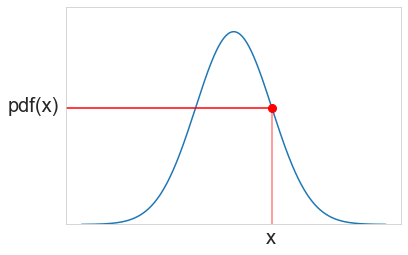

In [8]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_ylim(0,0.45) # range
ax.axhline(y=0.24,xmax=0.61,color='r') # horizontal line
ax.axvline(x=1, ymax=0.53, color='r',alpha=0.5) # vertical line
xplot = ax.plot([1], [0.24], marker='o', markersize=8, color="red") # coordinate point
ax.set_yticks([]) # remove y axis label
ax.set_xticks([]) # remove x axis label
ax.set_xlabel('x',fontsize=20) # set x label
ax.set_ylabel('pdf(x)',fontsize=20,rotation=0) # set y label
ax.xaxis.set_label_coords(0.61, -0.02) # x label coordinate
ax.yaxis.set_label_coords(-0.1, 0.5) # y label coordinate
plt.show()

### **Normal distribution PDF with different standard deviations** 

Let’s plot the probability distribution functions of a normal distribution where the mean has different standard deviations.
scipy.norm.pdf has keywords, loc and scale. The location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

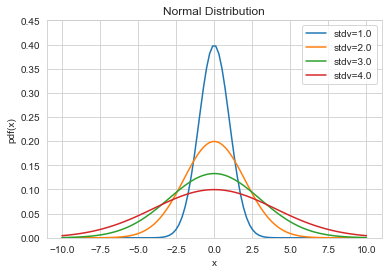

In [9]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
stdvs = [1.0, 2.0, 3.0, 4.0]
for s in stdvs:
    ax.plot(x, norm.pdf(x,scale=s), label='stdv=%.1f' % s)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### **Normal distribution PDF with different means**  

Let’s plot probability distribution functions of normal distribution where the standard deviation is 1 and different means. The mean of the distribution determines the location of the center of the graph. As you can see in the above graph, the shape of the graph does not change by changing the mean, but the graph is translated horizontally.

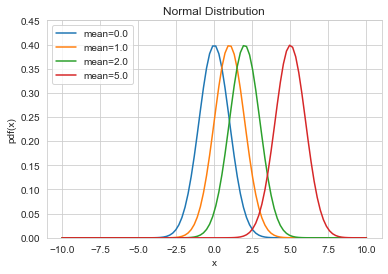

In [10]:
fig, ax = plt.subplots()
x = np.linspace(-10,10,100)
means = [0.0, 1.0, 2.0, 5.0]
for mean in means:
    ax.plot(x, norm.pdf(x,loc=mean), label='mean=%.1f' % mean)
    
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.set_title('Normal Distribution')
ax.legend(loc='best', frameon=True)
ax.set_ylim(0,0.45)
ax.grid(True)

### **A cumulative normal distribution function**  

The cumulative distribution function of a random variable X, evaluated at x, is the probability that X will take a value less than or equal to x. Since the normal distribution is a continuous distribution, the shaded area of the curve represents the probability that X is less or equal than x. Using fill_between(x, y1, y2=0), it will fill up the area between two curves y1 and y2 which has the default value of 0.

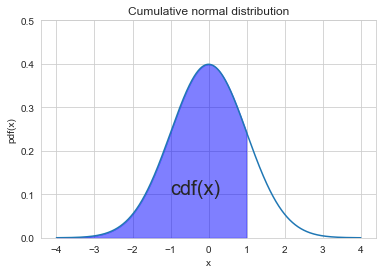

In [11]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Cumulative normal distribution")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,1,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='b')
# for text
ax.text(-1,0.1,"cdf(x)", fontsize=20)
plt.show()


Given the mean of 3 and the standard deviation of 2, we can find the probability of $P(x<2)$.  

In norm.cdf, the location (loc) keyword specifies the mean and the scale (scale) keyword specifies the standard deviation.

In [12]:
from scipy.stats import norm
lessthan2=norm.cdf(x=2, loc=3, scale=2)
print(lessthan2)

0.3085375387259869


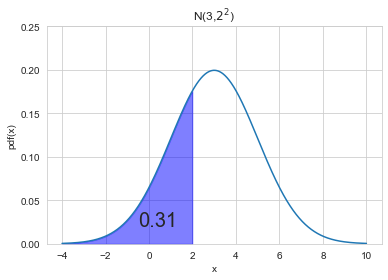

In [13]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
# for fill_between
px=np.arange(-4,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='b')
# for text
ax.text(-0.5,0.02,round(lessthan2,2), fontsize=20)
plt.show()

### **Interval between variables**

To find the probability of an interval between certain variables, you need to subtract cdf from another cdf. Let's find $P(0.5<X<2)$ with a mean of 1 and a standard deviation of 2.

In [14]:
norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)

0.2901687869569368

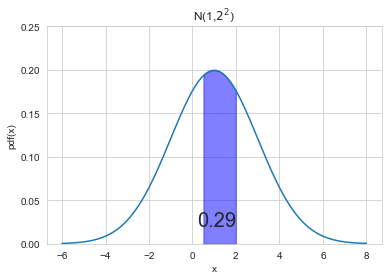

In [15]:
fig, ax = plt.subplots()
# for distribution curve
x= np.arange(-6,8,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=2))
ax.set_title("N(1,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(0.5,2,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=1,scale=2),alpha=0.5, color='b')
pro=norm(1, 2).cdf(2) - norm(1,2).cdf(0.5)
ax.text(0.2,0.02,round(pro,2), fontsize=20)
plt.show()

### Survival function

To find the probability of $𝑃(𝑋>4)$, we can use sf which is called the survival function and it returns 1-cdf. For example, norm.sf(x=4, loc=3, scale=2 returns the probability which is greater than $𝑥=4$,$𝑃(𝑋>4)$ when $\mu=4,\sigma=2.$

In [16]:
gr4sf=norm.sf(x=4, loc=3, scale=2)
gr4sf

0.3085375387259869

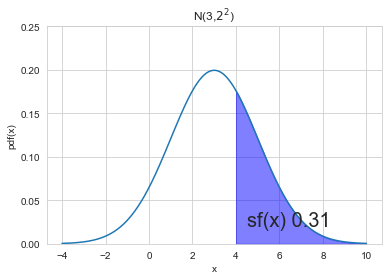

In [17]:
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='b')
ax.text(4.5,0.02,"sf(x) %.2f" %(gr4sf), fontsize=20)
plt.show()

The above graph is the same as $1−𝑃(𝑋<4)$

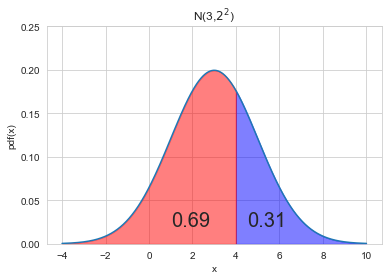

In [18]:
gr4=norm.cdf(x=4, loc=3, scale=2)
gr14=1-gr4
fig, ax = plt.subplots()
x= np.arange(-4,10,0.001)
ax.plot(x, norm.pdf(x,loc=3,scale=2))
ax.set_title("N(3,$2^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(4,10,0.01)
ax.set_ylim(0,0.25)
ax.fill_between(px,norm.pdf(px,loc=3,scale=2),alpha=0.5, color='b')
px1=np.arange(-4,4,0.01)
ax.fill_between(px1,norm.pdf(px1,loc=3,scale=2),alpha=0.5, color='r')
ax.text(4.5,0.02,round(gr14,2), fontsize=20)
ax.text(1,0.02,round(gr4,2), fontsize=20)
plt.show()

### **Finding quantiles**
$K$ in $P(X\leq K)=0.95$ is known as quantile, in this case, the 95% quantile.

### **Percent point function**

ppf is the inverse of cdf and it is called the Percent point function. Given the mean of 1 and the standard deviation of 3, we can find the quantile a in $P(X<a)=0.506$ by using ppf.

In [19]:
norm.ppf(q=0.506, loc=1, scale=3)

1.045121010035907

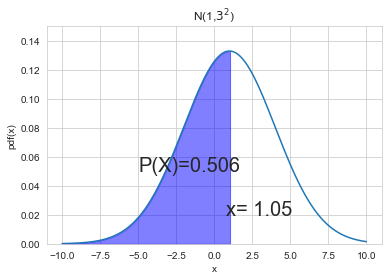

In [20]:
fig, ax = plt.subplots()
x= np.arange(-10,10,0.001)
ax.plot(x, norm.pdf(x,loc=1,scale=3))
ax.set_title("N(1,$3^2$)")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
xpoint=norm.ppf(q=0.506, loc=1, scale=3)
px=np.arange(-10,xpoint,0.01)
ax.set_ylim(0,0.15)
ax.fill_between(px,norm.pdf(px,loc=1,scale=3),alpha=0.5, color='b')
ax.text(.8,0.02,"x= %.2f" %xpoint, fontsize=20)
ax.text(-5,0.05,"P(X)=0.506", fontsize=20)
plt.show()

### **Inverse survival function**  

With the same mean and standard deviation, we can find the quantile b in $P(X>b)=0.198$ using the inverse survival function isf. This is the same as using ppf with $q=(1−0.198).$

In [21]:
norm.isf(q=0.198, loc=1, scale=3)

3.5463600577479006

In [22]:
norm.ppf(q=(1-0.198), loc=1, scale=3)

3.546360057747901

Interval around the mean
norm.interval returns endpoints of the range that contains the alpha percent of the distribution. For example, with a mean of 0 and a standard deviation of 1 to find 95% of the probability, norm.interval returns x values around the mean, in this case, $\mu$=0

In [23]:
a,b = norm.interval(alpha=0.95, loc=0, scale=1)
print(a,b)

-1.959963984540054 1.959963984540054


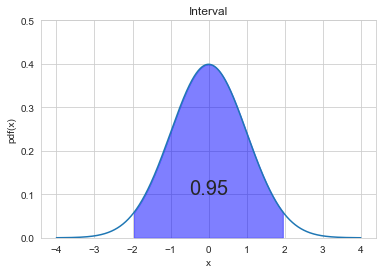

In [24]:
fig, ax = plt.subplots()
x= np.arange(-4,4,0.001)
ax.plot(x, norm.pdf(x))
ax.set_title("Interval")
ax.set_xlabel('x')
ax.set_ylabel('pdf(x)')
ax.grid(True)
px=np.arange(a,b,0.01)
ax.set_ylim(0,0.5)
ax.fill_between(px,norm.pdf(px),alpha=0.5, color='b')
ax.text(-0.5,0.1,"0.95", fontsize=20)
plt.show()